# 作业第二周  MLP模型练习fashion_mnist分类操作

In [1]:
#首先执行GPU资源分配代码，勿删除。
import GPU
GPU.show()
GPU.alloc(0,512)

ModuleNotFoundError: No module named 'GPU'

In [17]:
import tensorflow as tf
import keras
import numpy as np
from keras.utils import np_utils
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [3]:
num_epochs = 1        #训练的周期
batch_size = 100      #批训练的数量
learning_rate = 0.001 #学习率（0.1,0.01,0.001）

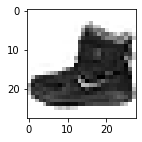

In [41]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2) # 设置图片大小
    plt.imshow(image, cmap='binary') #显示灰度图
    plt.show()
plot_image(x_train[0])



In [5]:
x_Train =x_train.reshape(60000, 784).astype('float32')
x_Test = x_test.reshape(10000, 784).astype('float32')



x_Train_normalize = x_Train/ 255
x_Test_normalize = x_Test/ 255

y_TrainOneHot = np_utils.to_categorical(y_train)
y_TestOneHot = np_utils.to_categorical(y_test)
y_TrainOneHot[:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [6]:
from keras.models import Sequential
from keras.layers import Dense

 #后续的组件用model.add的方法
model = Sequential()

# 建立输入层和隐藏层
model.add(Dense(units=256, #隐藏层神经元个数256
                input_dim=784, #输入层784
                kernel_initializer='normal',#正态分布的随机数来初始化weight and bias
                activation='relu')) # activation function is relu
# 建立输出层
model.add(Dense(units=10, #输出层的神经元个数为10个
                kernel_initializer='normal', #正态分布的随机数来初始化weight and bias
                activation='softmax'))# 激活函数为softmax，其可将输出转化为预测的概率


In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [9]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_TrainOneHot,validation_split=0.2, 
                         epochs=20, batch_size=200,verbose=2)


Epoch 1/20
240/240 - 3s - loss: 0.5995 - accuracy: 0.7958 - val_loss: 0.4687 - val_accuracy: 0.8340 - 3s/epoch - 12ms/step
Epoch 2/20
240/240 - 1s - loss: 0.4192 - accuracy: 0.8528 - val_loss: 0.4293 - val_accuracy: 0.8527 - 990ms/epoch - 4ms/step
Epoch 3/20
240/240 - 1s - loss: 0.3750 - accuracy: 0.8666 - val_loss: 0.3808 - val_accuracy: 0.8671 - 1s/epoch - 5ms/step
Epoch 4/20
240/240 - 1s - loss: 0.3436 - accuracy: 0.8786 - val_loss: 0.3629 - val_accuracy: 0.8712 - 916ms/epoch - 4ms/step
Epoch 5/20
240/240 - 1s - loss: 0.3254 - accuracy: 0.8824 - val_loss: 0.3505 - val_accuracy: 0.8729 - 839ms/epoch - 3ms/step
Epoch 6/20
240/240 - 1s - loss: 0.3060 - accuracy: 0.8887 - val_loss: 0.3356 - val_accuracy: 0.8792 - 923ms/epoch - 4ms/step
Epoch 7/20
240/240 - 1s - loss: 0.2905 - accuracy: 0.8950 - val_loss: 0.3431 - val_accuracy: 0.8767 - 898ms/epoch - 4ms/step
Epoch 8/20
240/240 - 1s - loss: 0.2835 - accuracy: 0.8969 - val_loss: 0.3228 - val_accuracy: 0.8848 - 954ms/epoch - 4ms/step
Epoch

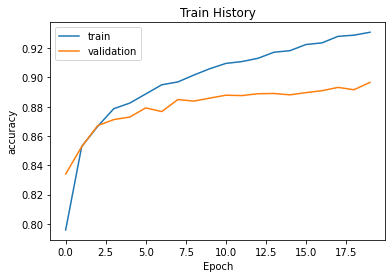

In [10]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    
    plt.show()
show_train_history(train_history,'accuracy','val_accuracy')

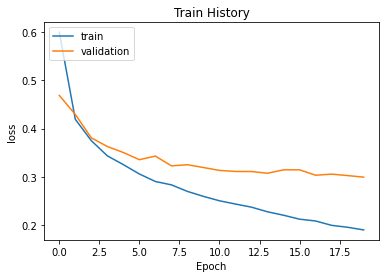

In [11]:
show_train_history(train_history,'loss','val_loss')

In [12]:
scores = model.evaluate(x_Test_normalize, y_TestOneHot)
print()
print('accuracy=',scores[1])

313/313 [==============================] - 2s 4ms/step - loss: 0.3283 - accuracy: 0.8868

accuracy= 0.8867999911308289


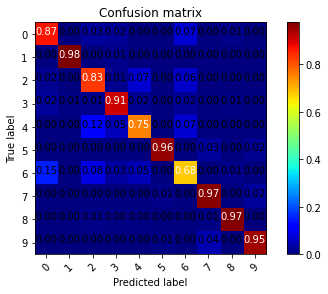

In [20]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# 显示混淆矩阵
def plot_confuse(model, x_val, y_val):
    predict_x=model.predict(x_val) 
    predictions=np.argmax(predict_x,axis=1)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1))

    
plot_confuse(model, x_Test_normalize, y_TestOneHot)

In [25]:
# 混淆矩阵
predict_x=model.predict(x_Test) 
prediction=np.argmax(predict_x,axis=1)
import pandas as pd
pd.crosstab(y_test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,878,5,23,10,6,0,62,0,16,0
1,3,985,0,7,3,0,1,0,1,0
2,19,1,759,7,158,0,52,0,4,0
3,35,28,10,836,57,0,24,0,9,1
4,0,1,50,18,893,0,34,0,4,0
5,0,0,0,0,0,930,0,27,5,38
6,168,2,76,19,99,0,620,0,16,0
7,0,0,0,0,0,5,0,905,2,88
8,2,0,4,0,4,1,2,5,982,0


In [27]:
df = pd.DataFrame({'label':y_test, 'predict':prediction}) 
# 类型 pandas.core.frame.DataFrame
# 长度为10000
print(df[:5]) #显示前5项

   label  predict
0      9        9
1      2        2
2      1        1
3      1        1
4      6        6


In [37]:
a = df[(df.label==6)&(df.predict==0)]
print(a)
b=df[(df.label==0)&(df.predict==0)]
print(b)

      label  predict
40        6        0
286       6        0
407       6        0
474       6        0
563       6        0
...     ...      ...
9644      6        0
9729      6        0
9955      6        0
9977      6        0
9979      6        0

[168 rows x 2 columns]
      label  predict
19        0        0
27        0        0
35        0        0
59        0        0
71        0        0
...     ...      ...
9945      0        0
9951      0        0
9958      0        0
9980      0        0
9981      0        0

[878 rows x 2 columns]


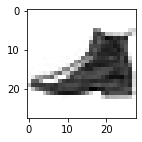

In [40]:
# 典型错误图片
plot_image(x_train[563])

In [ ]:
# 作业第二周  MLP模型练习fashion_mnist分类操作

仿照课件完成fashion_mnist的分类操作：
1.练习keras内置数据集fashion_mnist的读取与操作。
Fashion-MNIST克隆了MNIST的所有外在特征： 60000张训练图像和对应Label； 10000张测试图像和对应Label； 10个类别；
(train_images, train_labels),(test_images,test_labels)= tf.keras.datasets.fashion_mnist.load_data()

2.设计一个简单多层感知机网络，训练fashion_mnist的分类操作。
(打印loss变化曲线曲线，显示测试集最后的预测准确率、混淆矩阵、典型误判图像等)

#首先执行GPU资源分配代码，勿删除。
import GPU
GPU.show()
GPU.alloc(0,512)

import tensorflow as tf
import keras
import numpy as np
from keras.utils import np_utils
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

num_epochs = 1        #训练的周期
batch_size = 100      #批训练的数量
learning_rate = 0.001 #学习率（0.1,0.01,0.001）

import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2) # 设置图片大小
    plt.imshow(image, cmap='binary') #显示灰度图
    plt.show()
plot_image(x_train[0])



x_Train =x_train.reshape(60000, 784).astype('float32')
x_Test = x_test.reshape(10000, 784).astype('float32')



x_Train_normalize = x_Train/ 255
x_Test_normalize = x_Test/ 255

y_TrainOneHot = np_utils.to_categorical(y_train)
y_TestOneHot = np_utils.to_categorical(y_test)
y_TrainOneHot[:3]

from keras.models import Sequential
from keras.layers import Dense

 #后续的组件用model.add的方法
model = Sequential()

# 建立输入层和隐藏层
model.add(Dense(units=256, #隐藏层神经元个数256
                input_dim=784, #输入层784
                kernel_initializer='normal',#正态分布的随机数来初始化weight and bias
                activation='relu')) # activation function is relu
# 建立输出层
model.add(Dense(units=10, #输出层的神经元个数为10个
                kernel_initializer='normal', #正态分布的随机数来初始化weight and bias
                activation='softmax'))# 激活函数为softmax，其可将输出转化为预测的概率


print(model.summary())

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

train_history =model.fit(x=x_Train_normalize,
                         y=y_TrainOneHot,validation_split=0.2, 
                         epochs=20, batch_size=200,verbose=2)


import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    
    plt.show()
show_train_history(train_history,'accuracy','val_accuracy')

show_train_history(train_history,'loss','val_loss')

scores = model.evaluate(x_Test_normalize, y_TestOneHot)
print()
print('accuracy=',scores[1])

from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# 显示混淆矩阵
def plot_confuse(model, x_val, y_val):
    predict_x=model.predict(x_val) 
    predictions=np.argmax(predict_x,axis=1)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1))

    
plot_confuse(model, x_Test_normalize, y_TestOneHot)

# 混淆矩阵
predict_x=model.predict(x_Test) 
prediction=np.argmax(predict_x,axis=1)
import pandas as pd
pd.crosstab(y_test,prediction,
            rownames=['label'],colnames=['predict'])

df = pd.DataFrame({'label':y_test, 'predict':prediction}) 
# 类型 pandas.core.frame.DataFrame
# 长度为10000
print(df[:5]) #显示前5项

a = df[(df.label==6)&(df.predict==0)]
print(a)
b=df[(df.label==0)&(df.predict==0)]
print(b)

# 典型错误图片
plot_image(x_train[563])

